# importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Load the dataSet

In [3]:
df = pd.read_csv('hotel_bookings .csv')

# Exploratory Data Analysis and Data Cleaning

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [7]:
df.shape

(119390, 32)

In [11]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
df['reservation_status_date']  = pd.to_datetime(df['reservation_status_date'],format='%d/%m/%Y')

In [24]:
df.info()


In [25]:
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [28]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [33]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('--'*30)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [34]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [46]:
#Dropping missing rows from the dataset
df.dropna(inplace = True)

In [42]:
# Dropping columns: agent, company (too many missing records)
df.columns = df.columns.str.strip()


In [47]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [50]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


<Axes: xlabel='adr'>

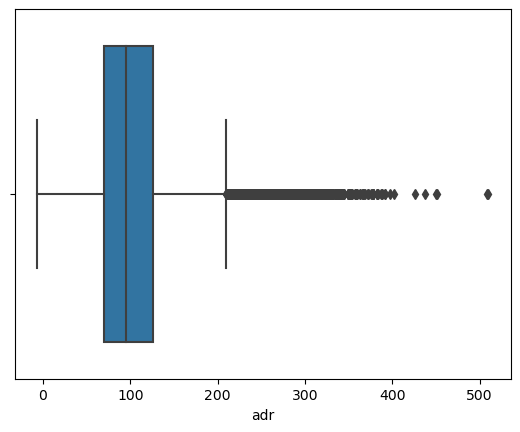

In [82]:
sns.boxplot(data = df, x = 'adr' )

Spotted extreme outlier in adr (average daily rate)

In [49]:
#removing the outlier from the dataset 

df = df[df['adr']<5000]

# Data Analysis and Visualization

In [55]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)  
cancelled_perc
# value counts returns the category name and how many times it is present in the column
# normalize = True displays the percentage 


is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

Booking not cancelled = 0.628653
Booking cancelled = 0.371347

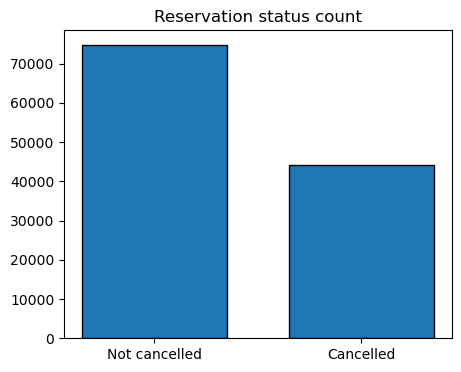

In [62]:
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor = 'k',width = 0.7 )
plt.show()

Finding cancellation status with respect to hotels

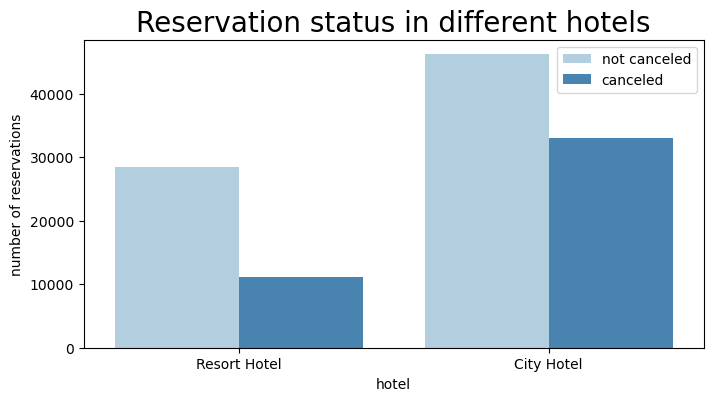

In [67]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot( x = 'hotel', hue = 'is_canceled', data = df , palette = 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels',size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

In [69]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

# Resort hotel reservation status
- Not Cancelled: 0.72025
- Cancelled: 0.27975


In [72]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [71]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

# City hotel reservation status
- Not Cancelled: 0.582918
- Cancelled : 0.417082

In [86]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean().reset_index()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean().reset_index()

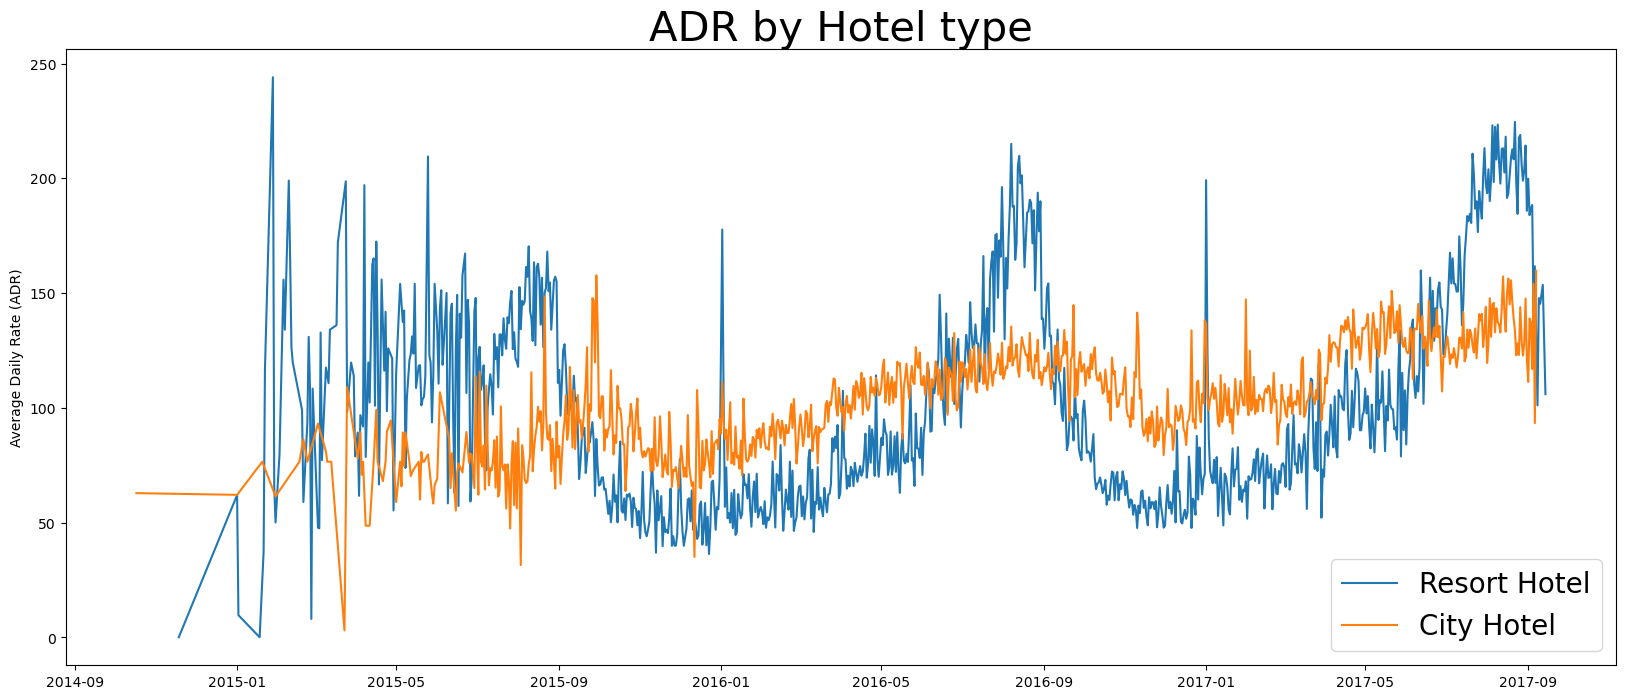

In [88]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = resort_hotel, x = 'reservation_status_date', y = 'adr', label = 'Resort Hotel')
sns.lineplot(data = city_hotel, x = 'reservation_status_date', y = 'adr', label = 'City Hotel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xlabel('')
plt.title('ADR by Hotel type', fontsize = 30)
plt.legend(fontsize = 20)
plt.show()


1. ADR of Resort is much higher thnan City Hotels in some periods.
2. High prices might be cause for cancellations for Resorts.

Finding reservation status with respect to months.


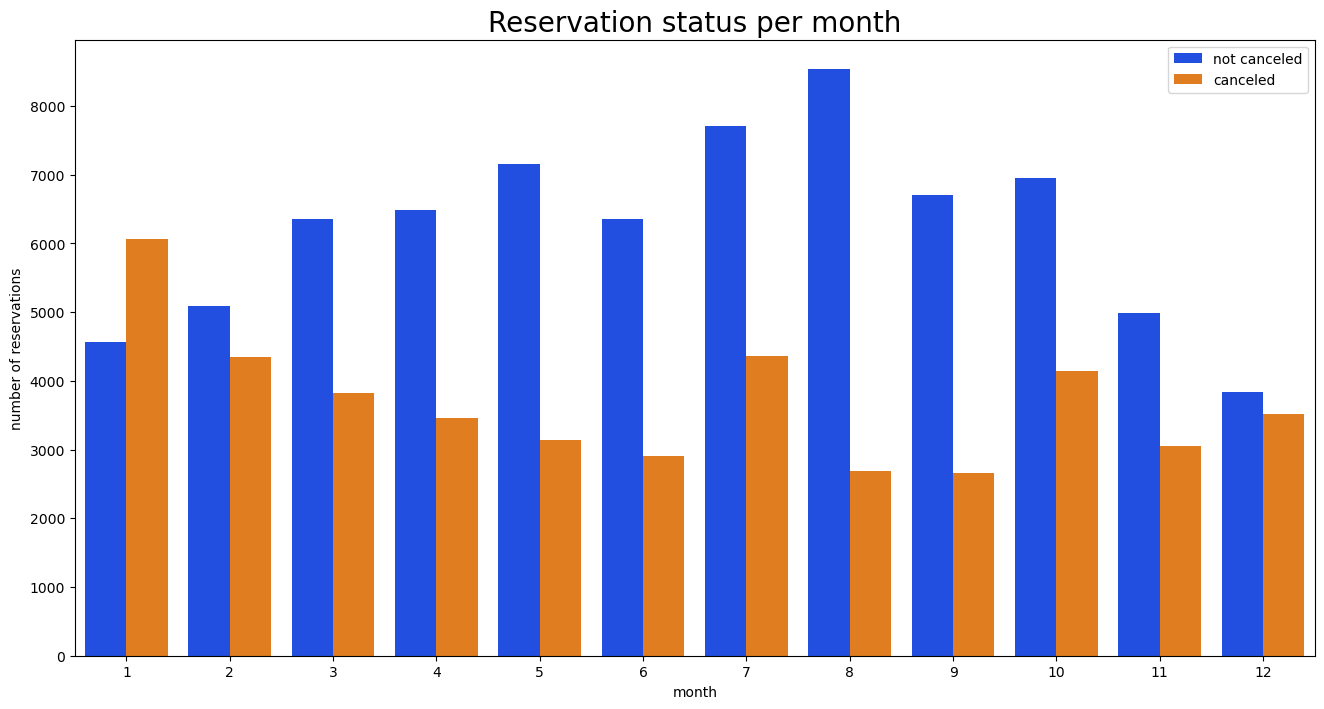

In [79]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month' , hue = 'is_canceled', data = df, palette = 'bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

- Highest cancellations: January
- Lowest cancellations: August
- Highest reservations: August
- Lowest reservations: December

# Reservation status w.r.t. months for City and Resort hotel¶


In [90]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']


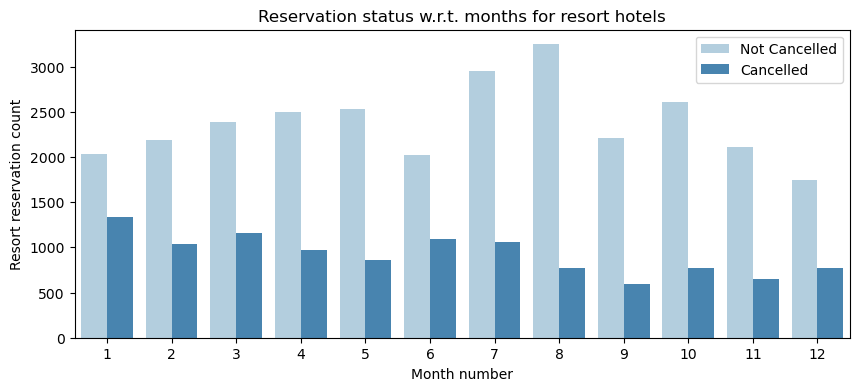

In [93]:
plt.figure(figsize = (10,4))
sns.countplot(data = resort_hotel, x = 'month', hue = 'is_canceled', palette = 'Blues')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Reservation status w.r.t. months for resort hotels')
plt.ylabel('Resort reservation count')
plt.xlabel('Month number')
plt.show()


Resort hotel reservation status w.r.t. months
- Highest cancellations: January
- Lowest cancellations: September
- Highest reservations: August
- Lowest reservations: December

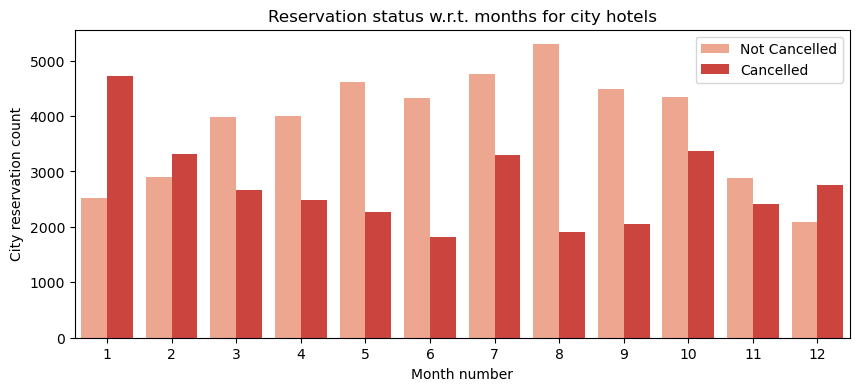

In [96]:
plt.figure(figsize = (10,4))
sns.countplot(data = city_hotel, x = 'month', hue = 'is_canceled', palette = 'Reds')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Reservation status w.r.t. months for city hotels')
plt.ylabel('City reservation count')
plt.xlabel('Month number')
plt.show()

 City hotel reservation status w.r.t. months
- Highest cancellations: January
- Lowest cancellations: June
- Highest reservations: August
- Lowest reservations: December

ADR by month for cancelled reservations only

In [97]:
cancelled_city = df[(df['is_canceled'] == 1) & (df['hotel'] == 'City Hotel')].groupby('month')[['adr']].sum().reset_index()

In [98]:
cancelled_resort = df[(df['is_canceled'] == 1) & (df['hotel'] == 'Resort Hotel')].groupby('month')[['adr']].sum().reset_index()


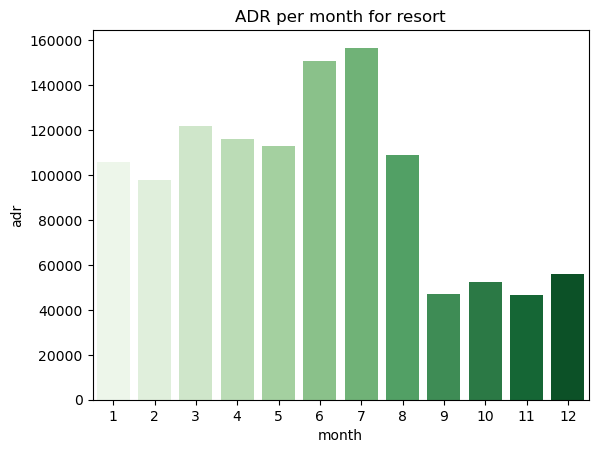

In [99]:
plt.title('ADR per month for resort')
sns.barplot(x = 'month',y = 'adr', data = cancelled_resort, palette = 'Greens')
plt.show()

Resort hotel adr status
- Highest adr: June & July
- Lowest adr: September

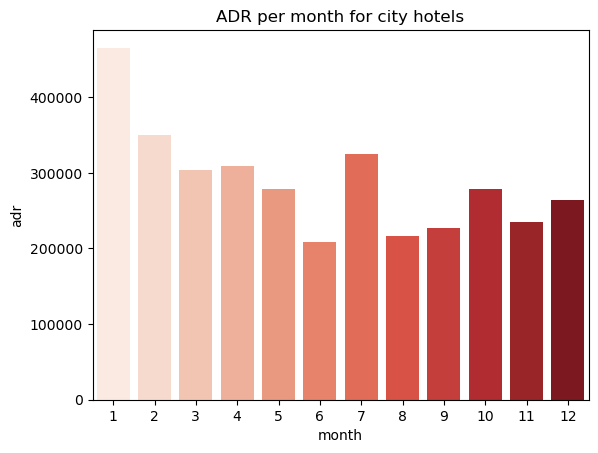

In [100]:
plt.title('ADR per month for city hotels')
sns.barplot(x = 'month',y = 'adr', data = cancelled_city, palette = 'Reds')
plt.show()

City hotel adr status
- Highest adr: January
- Lowest adr: June & August

In [101]:
cancelled_df_adr = df[df['is_canceled'] == 1].groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_df_adr = df[df['is_canceled'] == 0].groupby('reservation_status_date')[['adr']].mean().reset_index()

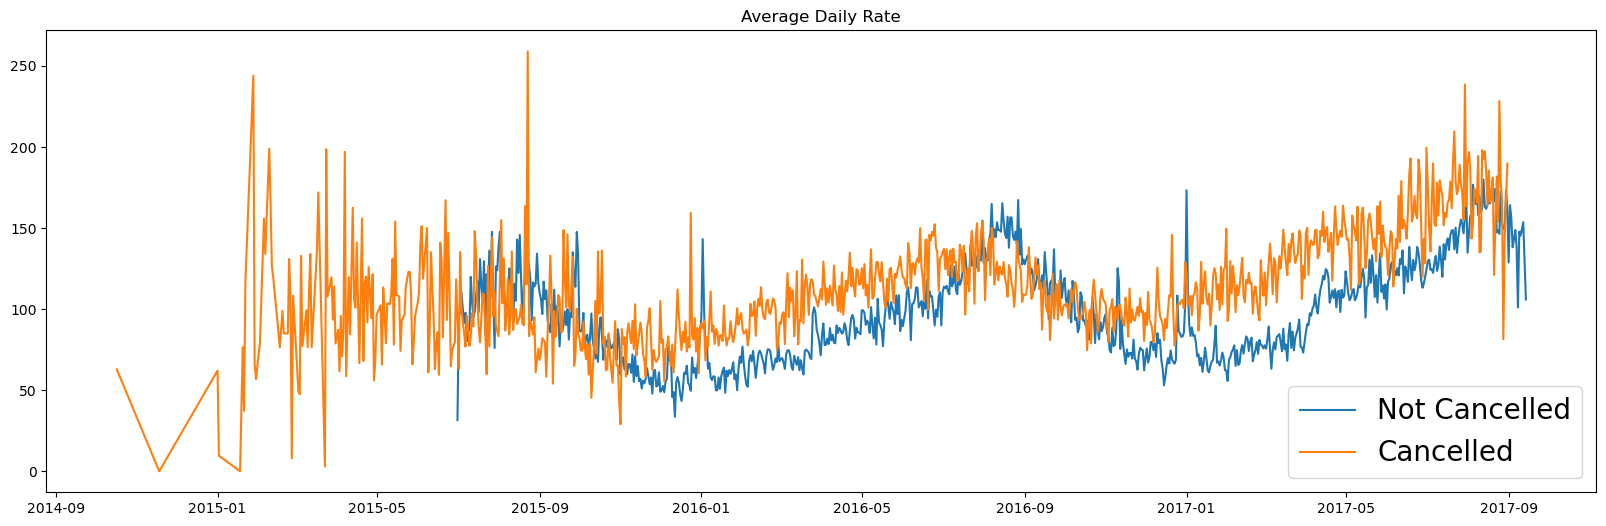

In [102]:
plt.figure(figsize = (20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 20)
plt.show()

In [103]:
# filtering data from 2016 
cancelled_df_adr = df[(df['is_canceled'] == 1) & (df['reservation_status_date'] > '2016')].groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_df_adr = df[(df['is_canceled'] == 0) & (df['reservation_status_date'] > '2016')].groupby('reservation_status_date')[['adr']].mean().reset_index()

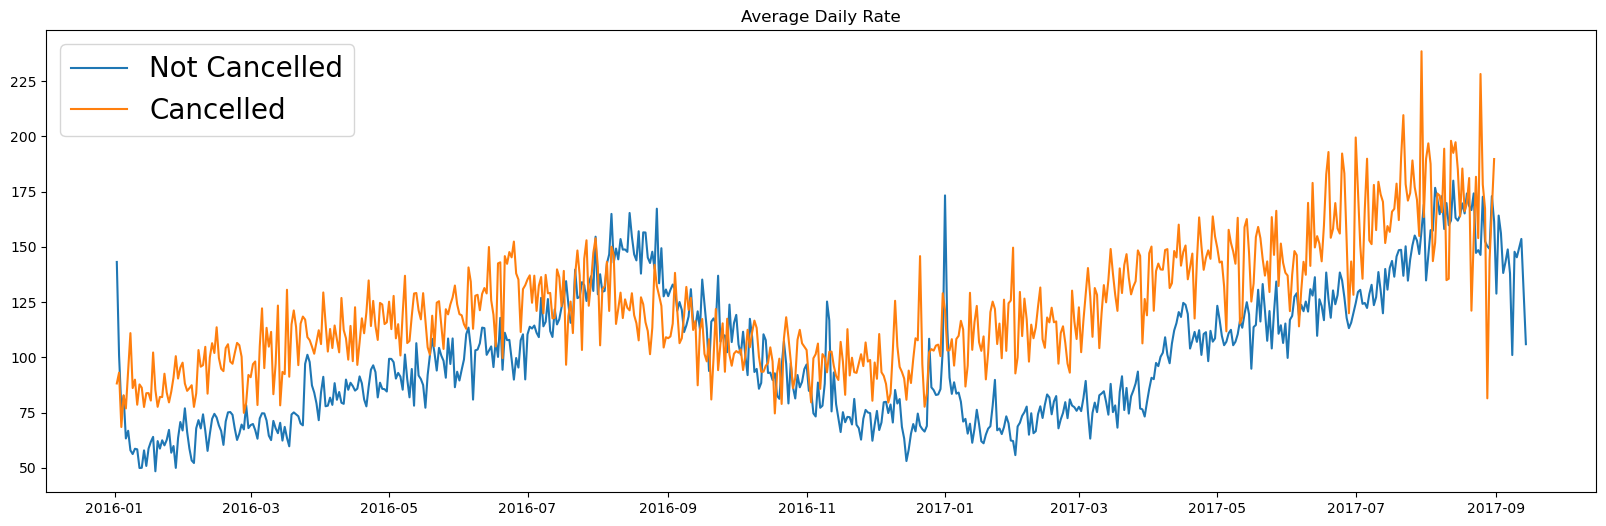

In [104]:
plt.figure(figsize = (20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 20)
plt.show()

Conclusion
- Overall high cancellations when prices are high.

Finding cancellation reason for resorts

In [106]:
# Is higher cencellations related to lead_time in resorts
resort = df[df['hotel'] == 'Resort Hotel']
resort.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7


In [107]:
resort_canceled = resort[(resort['is_canceled'] == 1) & (resort['reservation_status_date'] > '2016')]
resort_not_canceled = resort[(resort['is_canceled'] == 0) & (resort['reservation_status_date'] > '2016')]

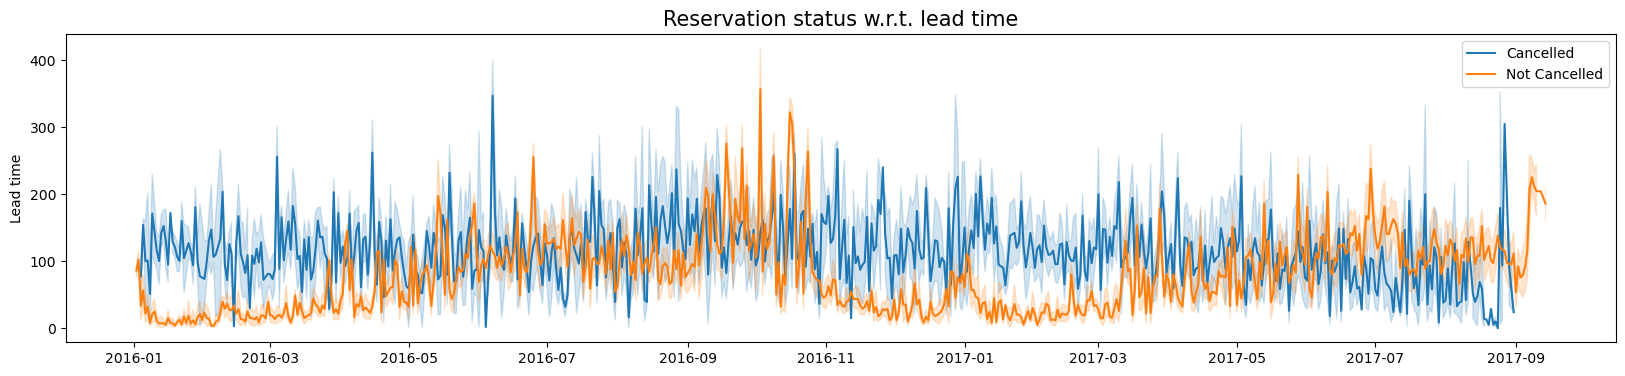

In [110]:
plt.figure(figsize=(20, 4))
ax2 = sns.lineplot(data=resort_canceled, x='reservation_status_date', y='lead_time', label='Cancelled')
sns.lineplot(data=resort_not_canceled, x='reservation_status_date', y='lead_time', label='Not Cancelled', ax=ax2)
plt.Finding('Reservation status w.r.t. lead time', fontsize = 15)
plt.xlabel('')
plt.ylabel('Lead time')
plt.legend(fontsize=10)
plt.show()

Finding
- Longer lead time are leading to more cancellations in resort hotels


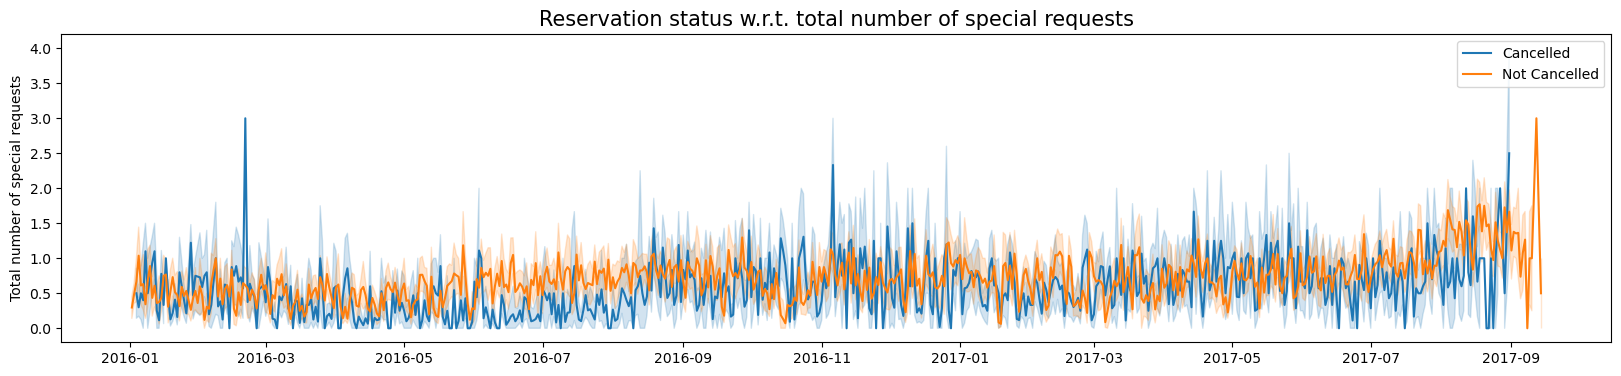

In [112]:
plt.figure(figsize = (20,4))
sns.lineplot(data = resort_canceled, x = 'reservation_status_date', y = 'total_of_special_requests', label = 'Cancelled')
sns.lineplot(data = resort_not_canceled, x = 'reservation_status_date', y = 'total_of_special_requests', label = 'Not Cancelled')
plt.title('Reservation status w.r.t. total number of special requests', fontsize = 15)
plt.xlabel('')
plt.ylabel('Total number of special requests')
plt.legend(fontsize = 10)
plt.show()

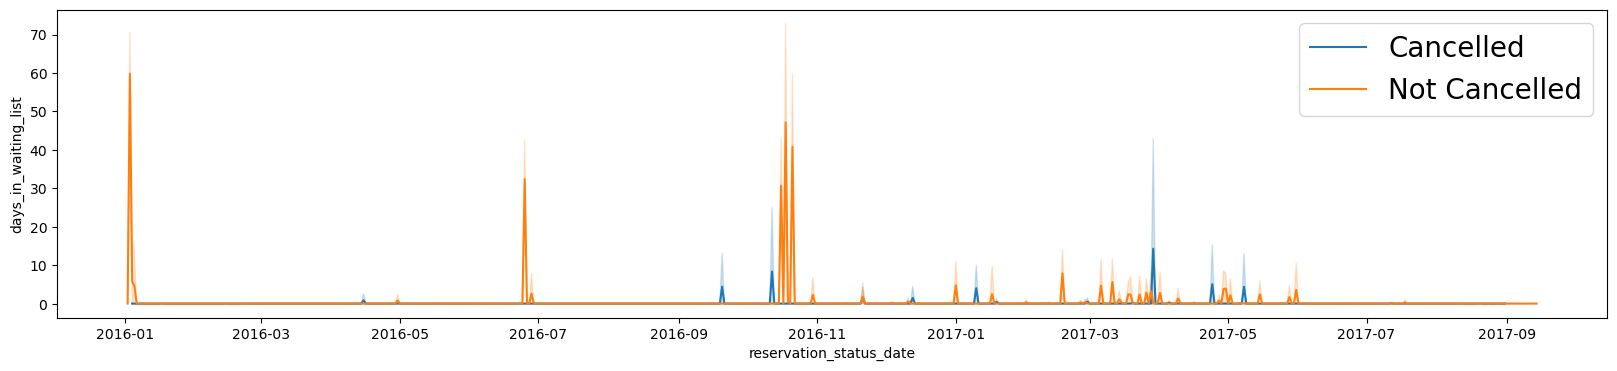

In [113]:
plt.figure(figsize = (20,4))
sns.lineplot(data = resort_canceled, x = 'reservation_status_date', y = 'days_in_waiting_list', label = 'Cancelled')
sns.lineplot(data = resort_not_canceled, x = 'reservation_status_date', y = 'days_in_waiting_list', label = 'Not Cancelled')
plt.title('')
plt.legend(fontsize = 20)
plt.show()

Analyzing cancellations by country

In [114]:
top_10_countr = df.groupby('country')[['is_canceled']].sum().sort_values(by = 'is_canceled', ascending = False).reset_index().head(10)
top_10_countr

,country,is_canceled
0,PRT,27514
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


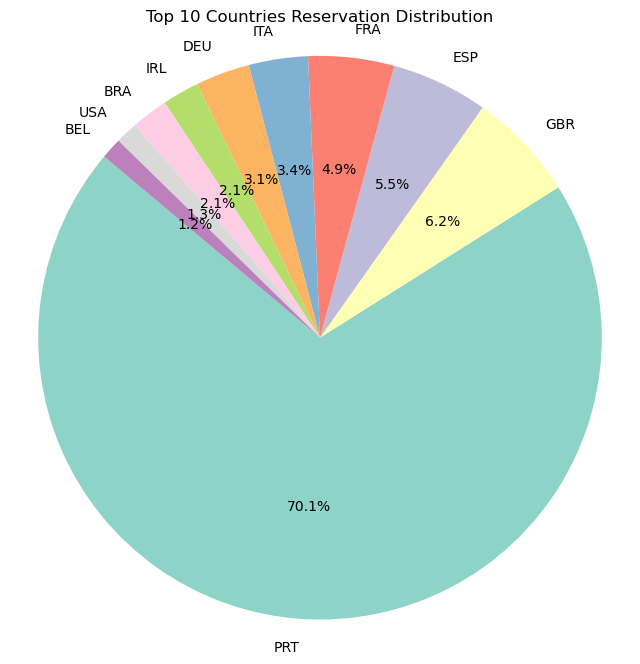

In [115]:
labels = top_10_countr['country']
sizes = top_10_countr['is_canceled']
colors = sns.color_palette("Set3")
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.axis('equal')
plt.title('Top 10 Countries Reservation Distribution')
plt.show()

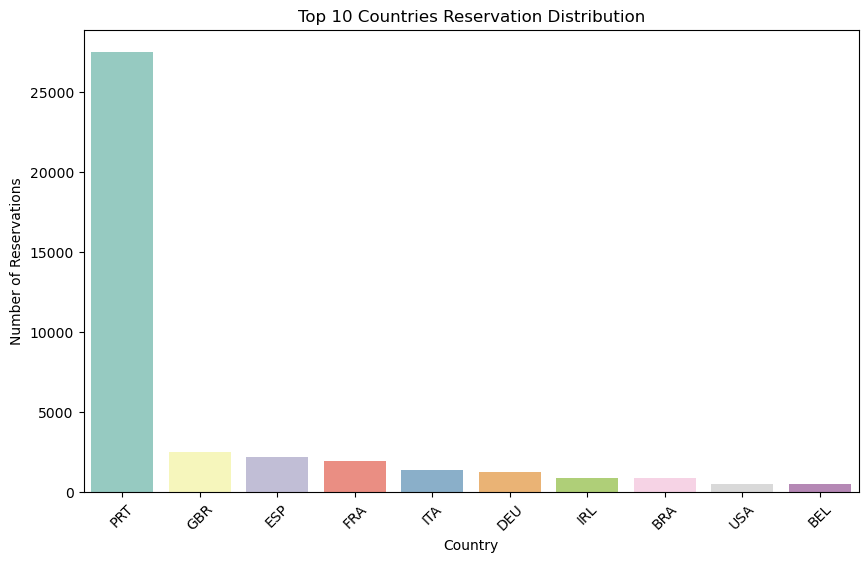

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(x="country", y="is_canceled", data=top_10_countr, palette="Set3")
plt.title('Top 10 Countries Reservation Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.show()

In [117]:
# Distribution of market segments
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [118]:
df['market_segment'].value_counts(normalize = True)


market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

Finding
- 47% booking from online medium

Suggestion
- Provide accurate photos of hotel to reduce cancellations.
- Utilize a reliable online booking platform that allows guests to make reservations easily. Provide high-quality photos and detailed descriptions of properties.
- Stay competitive with your pricing while maintaining the quality of the services. Offer promotions, discounts, and loyalty programs to attract repeat customers.
- Encourage satisfied guests to leave positive reviews on platforms like TripAdvisor, Yelp, or Google Reviews. Respond to reviews, whether positive or negative, to show the commitment to customer satisfaction.
- Use social media platforms to promote your hotel and engage with potential guests. Share high-quality images, updates, and special offers.

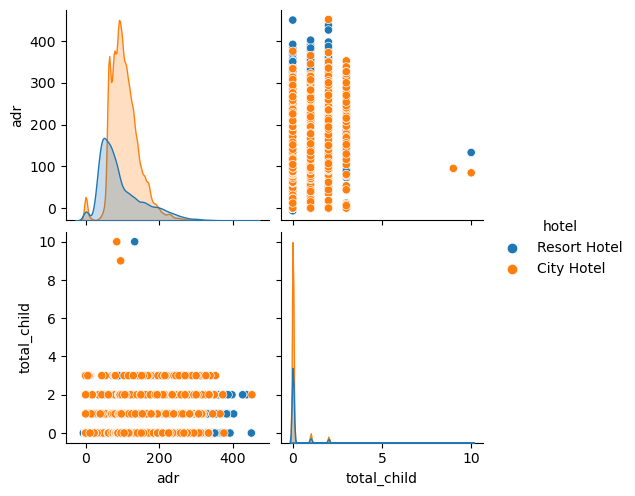

In [120]:
df['total_child'] = df['children'] + df['babies']
sns.pairplot(data = df[df['adr']<500][['hotel','adr', 'total_child']], hue='hotel')
plt.show()

Hotel type preference
- Families with kids prefer city hotels over resorts.
- Tourists without kids prefer resorts. This may include group of friends, couples, solo travellers

Suggestion
- Recognizing that City Hotel is the top choice for families traveling with their little ones is truly heartwarming. This valuable insight inspires us to go the extra mile in celebrating and enriching the family-friendly offerings and adventures at the City Hotel, ensuring that we create unforgettable moments for families planning their special getaways.
- To enhance the resort hotel experience for a target demographic of adult tourists without children, a strategic approach can be adopted to create a more couple-friendly and friends-friendly environment, catering to the preferences and needs of this specific market segment.


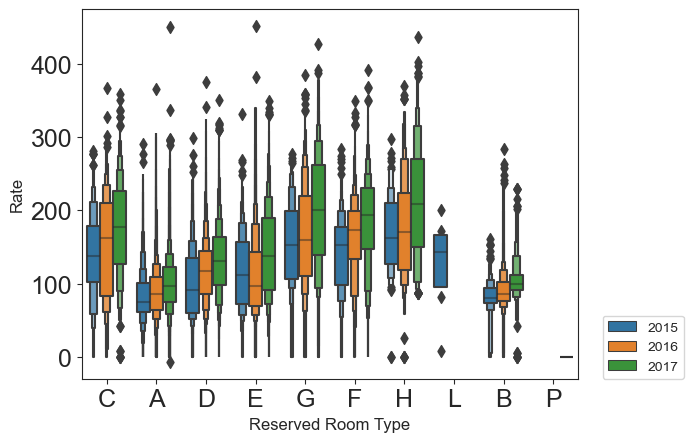

In [122]:
sns.set_style('ticks')
sns.boxenplot(data = df[df['adr']<500], x='reserved_room_type', y='adr', hue='arrival_date_year', width=0.8)
plt.xlabel('Reserved Room Type', fontsize=12)
plt.xticks(fontsize=18)
plt.ylabel('Rate', fontsize=12)
plt.yticks(fontsize=18)
plt.legend(loc=(1.05,0))
plt.show()

Room type preferences
- C, G, H are most preferred.
- A, D, B are least preferred.

Suggestion
- Room Upgrades: Consider offering room upgrades to guests who book less popular room types. This can be a way to upsell and generate more revenue. 
- Make sure to highlight the benefits of the upgraded room.

# Suggestions

- Strategic Pricing Adjustments: Cancellation rates tend to increase as room prices rise. To mitigate cancellations, hotels can optimize their pricing strategies by offering location-based discounts and special consumer incentives.

- Weekend and Holiday Discounts: Resort hotels experience a higher cancellation-to-booking ratio compared to city hotels. To address this, hotels should consider offering competitive discounts on room rates during weekends and holidays.

- January Revenue Boost Campaign: In the month of January, hotels can initiate revenue-boosting campaigns and marketing efforts at reasonable price points. This is especially valuable, given that January tends to have the highest cancellation rates.

- Early Bird Benefits: Offer discounts or perks for guests who book in advance, encouraging early reservations.

- Enhanced Quality and Service in Portugal: To reduce cancellation rates, hotels, particularly in Portugal, can focus on elevating the quality of their accommodations and services. This strategy aims to enhance guest satisfaction and loyalty, resulting in fewer cancellations.

- Effective Cancellation Management: Recognizing the emerging trend of post-cancellation payments, viewed as an opportunity to turn challenges into advantages from a business standpoint, we can effectively leverage this situation. By employing astute strategies aimed at reducing cancellations, including transparent terms and conditions, considerate reminders, and potentially introducing incentives for guests committed to their reservations, we can create a win-win scenario. This approach not only enhances the guest experience but also guarantees a consistent revenue flow for the business.